In [107]:
import pandas as pd
import numpy as np

In [108]:
df = pd.read_csv('SVMDATA.csv')

df.fillna(0, inplace=True)

df.head()
df.size

80396

In [109]:
import matplotlib.pyplot as plt
columns = df.columns.tolist()

features = [f for f in filter(lambda x: x not in ['Label', 'frameTime'], columns)]
target = ['Label']

feature_df = df[features]

X = np.asarray(feature_df)

y = np.asarray(df['Label'])


<img src="unnormalized(1).jpg"/>

In [111]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

X = scaler.transform(X)
df[features].shape

(202, 396)

<img src="normalized(1).jpg"/>

No handles with labels found to put in legend.


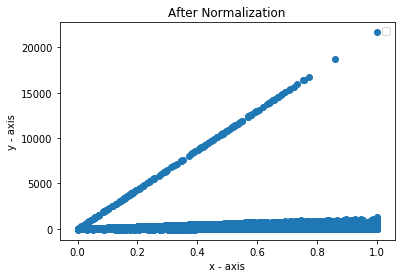

In [112]:
plt.scatter(X, df[features]) 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('After Normalization') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show()


In [18]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

X_train.shape

(181, 396)

<img src="RBF.png"/>

In [70]:
from sklearn import svm

classifier = svm.SVC(kernel='rbf', C=100, gamma=0.5)

classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         8
           2       1.00      0.69      0.82        13

   micro avg       0.81      0.81      0.81        21
   macro avg       0.83      0.85      0.81        21
weighted avg       0.87      0.81      0.81        21



In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8095238095238095

# Hyper Parameter Tunning 

In [29]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 

  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

C:\Users\Ashwin Ram\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5081967213114754, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5166666666666667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5166666666666667, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ......... C=0.1, gamma=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ......... C=0.1, gamma=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.9833333333333333, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[CV]  C=10, gamma=1, kernel=rbf, score=0.6333333333333333, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .......... C=10, gamma=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] .......... C=10, gamma=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.9833333333333333, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ........... C=10, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ........... C=10, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ........... C=10, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................

[CV]  C=1000, gamma=1, kernel=rbf, score=0.5737704918032787, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.6166666666666667, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.6333333333333333, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ........ C=1000, gamma=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ........ C=1000, gamma=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9833333333333333, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ......... C=1000, gamma=0.1, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf .......................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.7s finished
C:\Users\Ashwin Ram\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)